# Mistakes when A/B Testing

Resources:

* [A/B Testing Blog](https://www.widerfunnel.com/3-mistakes-invalidate-ab-test-results/)

# Mistake 1: Multiple Comparison/Multiple Testing/Multiple Hypothesis Testing/Lookover-Effect

Increased false positives when you increase the number of variations or hypotheses that are testing at the same time. Bonferonni correction attempts to mitigate this (albeit very conservatively by assuming that each hypothesis test is indepdendent of one another).

Wikipedia illustrates the Bonferroni correction with the following example: “If an experimenter is testing m hypotheses, [and] the desired significance level for the whole family of tests is a, then the Bonferroni correction would test each individual hypothesis at a significance level of a/m.

For example, if [you are] testing m = 8 hypotheses with a desired a = 0.05, then the Bonferroni correction would test each individual hypothesis at a = 0.05/8=0.00625.”

In other words, you’ll need a 0.625% significance level, which is the same as a 99.375% confidence level (100% – 0.625%) for an individual test.

The Bonferroni correction tends to be a bit too conservative and is based on the assumption that all tests are independent of each other. However, it demonstrates how multiple comparisons can skew your data if you don’t adjust the significance level accordingly.

In [0]:
import numpy as np

In [0]:
m=10
a=0.05
c = (1-0.95)**m
a/m

0.005

# Confidence intervals

The 95% confidence interval for a single draw from a normal distribution with mean mu and std deviation sigma is:

In [0]:
from scipy.stats import norm

predictions_of_mean_diabetes = np.array([1,2,3,4,4,4,5,5,5,5,4,4,4,6,7,8])

mu, sigma = np.mean(predictions_of_mean_diabetes), np.std(predictions_of_mean_diabetes)

lowerbound_ci, upperbound_ci = norm.interval(0.95, 
                   loc=mu, # loc = mean
                   scale=sigma) # scale = standard deviation

print(f"The 95% Confidence interval for a single draw of the predictions of blood glucose levels, with a distribution (mu, sigma) is: ({lowerbound_ci:.3f}, {upperbound_ci:.3f})")

The 95% Confidence interval for the predictions of blood glucose levels is: (1.190, 7.685)


The 95% confidence interval for the mean of N draws from a normal distribution with mean mu and std deviation sigma is

In [0]:
N_draws = 10

lowerbound_ci, upperbound_ci = norm.interval(0.95, 
                   loc=mu, # loc = mean
                   scale=sigma/np.sqrt(N_draws)) # scale = standard deviation

lowerbounds = []
upperbounds = []

for i in range(1, N_draws):
    lowerbound_ci, upperbound_ci = norm.interval(0.95, 
                   loc=mu, # loc = mean
                   scale=sigma/np.sqrt(i)) # scale = standard deviation
    print(f"The 95% Confidence interval for the 10 draws of predictions of blood glucose levels from a distribution (mu, sigma) is: ({lowerbound_ci:.3f}, {upperbound_ci:.3f})")
    lowerbounds.append(lowerbound_ci)
    upperbounds.append(upperbound_ci)

The 95% Confidence interval for the 10 draws of predictions of blood glucose levels from a distribution (mu, sigma) is: (1.190, 7.685)
The 95% Confidence interval for the 10 draws of predictions of blood glucose levels from a distribution (mu, sigma) is: (2.141, 6.734)
The 95% Confidence interval for the 10 draws of predictions of blood glucose levels from a distribution (mu, sigma) is: (2.562, 6.313)
The 95% Confidence interval for the 10 draws of predictions of blood glucose levels from a distribution (mu, sigma) is: (2.814, 6.061)
The 95% Confidence interval for the 10 draws of predictions of blood glucose levels from a distribution (mu, sigma) is: (2.985, 5.890)
The 95% Confidence interval for the 10 draws of predictions of blood glucose levels from a distribution (mu, sigma) is: (3.112, 5.763)
The 95% Confidence interval for the 10 draws of predictions of blood glucose levels from a distribution (mu, sigma) is: (3.210, 5.665)
The 95% Confidence interval for the 10 draws of predict

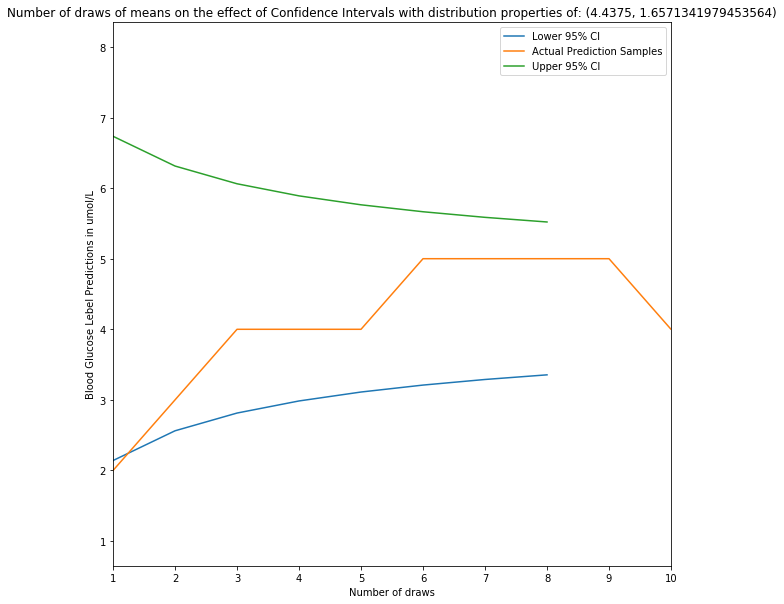

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 10))
plt.title(f"Number of draws of means on the effect of Confidence Intervals with distribution properties of: ({mu}, {sigma})")
plt.xlim(1, N_draws)
plt.ylabel("Blood Glucose Lebel Predictions in umol/L")
plt.xlabel("Number of draws")
ax.plot(lowerbounds, label="Lower 95% CI")
ax.plot(predictions_of_mean_diabetes, label="Actual Prediction Samples")
ax.plot(upperbounds, label="Upper 95% CI")
plt.legend()
plt.show()

The following tables summarize the multiple comparison problem.

![](https://www.widerfunnel.com/wp-content/uploads/2016/09/False-Positive.png)

In [0]:
m=41
a=0.05
c = (1-0.95)**m
print(f"Significance level with Bonferonni correction for {m} hypotheses simultaneously tested is {(a/m)*100:.5f}% for each test and the chance of a false positive is {c}")

Significance level with Bonferonni correction for 41 hypotheses simultaneously tested is 0.12195% for each test and the chance of a false positive is 4.547473508864807e-54


Adjusted significance and confidence levels to maintain a 5% false discovery probability:
![](https://www.widerfunnel.com/wp-content/uploads/2016/09/Confidence-levels-700x219.png)

Each additional variation and goal adds a new combination of individual statistics for online experiments comparisons to an experiment. In a scenario where there are four variations and four goals, that’s 16 potential outcomes that need to be controlled for separately.

Some A/B testing tools, such as VWO and Optimizely, adjust for the multiple comparison problem. These tools will make sure that the false positive rate of your experiment matches the false positive rate you think you are getting.

One final problem with testing multiple variations can occur when you are analyzing the results of your test. You may be tempted to declare the variation with the highest lift the winner, even though there is no statistically significant difference between the winner and the runner up. This means that, even though one variation may be performing better in the current test, the runner up could “win” in the next round.

You should consider both variations as winners.

# Mistake #2: You change experiment settings in the middle of a test

When you launch an experiment, you need to commit to it fully. Do not change the experiment settings, the test goals, the design of the variation or of the Control mid-experiment. And don’t change traffic allocations to variations.

Changing the traffic split between variations during an experiment will impact the integrity of your results because of a problem known as Simpson’s Paradox.This statistical paradox appears when we see a trend in different groups of data which disappears when those groups are combined.

Ronny Kohavi from Microsoft shares an example wherein a website gets one million daily visitors, on both Friday and Saturday. On Friday, 1% of the traffic is assigned to the treatment (i.e. the variation), and on Saturday that percentage is raised to 50%.

Even though the treatment has a higher conversion rate than the Control on both Friday (2.30% vs. 2.02%) and Saturday (1.2% vs. 1.00%), when the data is combined over the two days, the treatment seems to underperform (1.20% vs. 1.68%).

This is because we are dealing with weighted averages. The data from Saturday, a day with an overall worse conversion rate, impacted the treatment more than that from Friday.

![](https://www.widerfunnel.com/wp-content/uploads/2016/09/Table-1.png)

All Optimizers have a favorite variation that we secretly hope will win during any given test. This is not a problem until you start giving weight to the metrics that favor this variation. Decide on a goal metric that you can measure in the short term (the duration of a test) and that can predict your success in the long term. Track it and stick to it.

It is useful to track other key metrics to gain insights and/or debug an experiment, if something looks wrong. However, these are not the metrics you should look at to make a decision, even though they may favor your favorite variation.

# Mistake #3: You’re doing post-test segmentation incorrectly

Let’s say you have avoided the 2 mistakes I’ve already discussed, and you’re pretty confident about the results you see in your A/B testing tool. It’s time to analyze the results, right?

Not so fast! Did you stop the test as soon as it reached statistical significance?

I hope not…

Statistical significance should not dictate when you stop a test. It only tells you if there is a difference between your Control and your variations. This is why you should not wait for a test to be significant (because it may never happen) or stop a test as soon as it is significant. Instead, you need to wait for the calculated sample size to be reached before stopping a test. Use a test duration [calculator](https://vwo.com/tools/ab-test-duration-calculator/) to understand better when to stop a test.

Now, assuming you’ve stopped your test at the correct time, we can move on to segmentation. Segmentation and personalization are hot topics in marketing right now, and more and more tools enable segmentation and personalization.

It follows then, that after you stop a test, you probably start dissecting the results based on segments such as traffic source, new vs. returning users, device type, etc. This technique is called post-test segmentation and is one of the 3 ways to create personalization and segmentation hypotheses to test.

There are 2 main problems with post-test segmentation, however, that will impact the statistical validity of your segments (when done incorrectly).

1. The sample size of your segments is too small. You stopped the test when you reached the calculated sample size, but at a segment level the sample size is likely too small and the lift between segments has no statistical validity.

2. The multiple comparison problem. The more segments you compare, the greater the likelihood that you’ll get a false positive among those tests. With a 95% confidence level, you’re likely to get a false positive every 20 post-test segments you look at.

There are different ways to prevent these two issues, but the easiest and most accurate strategy is to create targeted tests (rather than breaking down results per segment post-test).

I don’t advocate against post-test segmentation―quite the opposite. In fact, looking at too much aggregate data can be misleading. (Simpson’s Paradox strikes back.)

The Wikipedia definition for Simpson’s Paradox provides a real-life example from a medical study comparing the success rates of two treatments for kidney stones.

The table below shows the success rates and numbers of treatments for treatments involving both small and large kidney stones.

![](https://www.widerfunnel.com/wp-content/uploads/2016/09/Stones.png)

In the context of an A/B test, this would look something like this:

![](https://www.widerfunnel.com/wp-content/uploads/2016/09/Aggregate-data-1-700x111.png)

Simpson’s Paradox surfaces when sampling is not uniform—that is the sample size of your segments is different. There are a few things you can do to prevent getting lost in and misled by this paradox.

First, you can prevent this problem from happening altogether by using stratified sampling, which is the process of dividing members of the population into homogeneous and mutually exclusive subgroups before sampling. However, most tools don’t offer this option.

If you are already in a situation where you have to decide whether to act on aggregate data or on segment data, Georgi Georgiev recommends you look at the story behind the numbers, rather than at the numbers themselves.

In order to do that in a data-driven manner, we should treat each source/page couple as a separate test variation and perform some additional testing until we reach the desired statistically significant result for each pair (currently we do not have significant results pair-wise).”

In a nutshell, it can be complicated to get post-test segmentation right, but when you do, it will unveil insights that your aggregate data can’t. Remember, you will have to validate the data for each segment in a separate follow up test.

The execution of an experiment is the most important part of a successful optimization strategy. If your tests are not executed properly, your results will be invalid and you will be relying on misleading data.

It is always tempting to showcase good results. Results are often the most important factor when your boss is evaluating the success of your conversion optimization department or agency.

But results aren’t always trustworthy. Too often, the numbers you see in case studies are lacking valid statistical inferences: either they rely too heavily on an A/B testing tool’s unreliable stats engine and/or they haven’t addressed the common pitfalls outlined in this post.

Use case studies as a source of inspiration, but make sure that you are executing your tests properly by doing the following:

1. If your A/B testing tool doesn’t adjust for the multiple comparison problem, make sure to correct your significance level for tests with more than 1 variation

2. Don’t change your experiment settings mid-experiment

3. Don’t use statistical significance as an indicator of when to stop a test, and make sure to calculate the sample size you need to reach before calling a test complete

4. Finally, keep segmenting your data post-test. But make sure you are not falling into the multiple comparison trap and are comparing segments that are significant and have a big enough sample size